## Part 7: For-loops, if-statements and pretty plots

_______________
*This is a translated version of Part 7 of the intro course to programming in Python written for Ekte Data ("Real Data"). Take a look at our [GitHub](https://github.com/julienweihs/GEOF/tree/main) for more exercises for working with real data in Python. Also, we're working on translating all exercises, but we're not quite done yet, so some of the links still go to exercises in norwegian.*

*-- Vår Dundas, 2023*
_______________________

In this exercise, we first look at **for-loops** and then **if-else statements**. 

**for-loops** are called this because the syntax translates to "for these scenarios, do this". This is practical when you want to do almost the same thing several times, e.g., find the trend for each 20-year period of a 200 year long data set. Or if you want to plot all these trend lines. Or maybe you have spatial data and you want to estimate the correlation between two variables in every spatial point. 

**if-statements** are useful if you only want to do an operation if a criteria is met, or if different conditions require different treatment. The syntax translates to "if this is the case, do that", e.g., "" or "if the value is more than 1000 print out the value". 

**Scatterplot** bruker vi tid på fordi dette er en enkel og veldig beskrivende metode for å se etter sammenhenger mellom to eller tre variabler. Flere av NAT624-studentene sammenlignet hverandres datasett og værmeldingen sine data i innleveringene sine. Noen av sammenlignet også med datasett over andre variabler enn temperatur, lastet ned fra f.eks. seklima.met.no. Å sammenligne to tidsserier kan gi mye informasjon, men scatterplot konsenterer sammenhenger på en litt annen måte som kan være nyttig. 

---------------



In [1]:
import numpy as np # mathematical operations etc
import matplotlib.pyplot as plt # for figures

import sys
# !!! Replace W:\Work\Documents\GEOF_UiB\Python with the path 
# on YOUR PC !!! 
# One clean way to do this is to locate your EkteDataFunk.py-file, 
# right-click it, and use the 'Copy Path' command
sys.path.append(r"W:\Work\Documents\GEOF_UiB\Python")
from EkteDataFunk import loadData # to load data

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
file='TempBergenYearlyNonan.txt'
temp,time = loadData(file)

In [4]:
time.shape, np.squeeze(temp).shape

((160,), (160,))

In [5]:
temp=np.squeeze(temp)

As always, start with plotting the data.

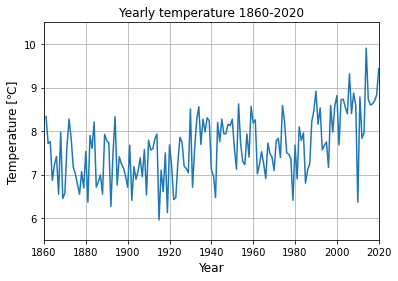

In [6]:
ax=plt.axes() # Make axes to plot in

# Plot the time series
ax.plot(time, temp)

# Define grid, labels etc.
ax.set(
    title='Yearly temperature 1860-2020',
    xlabel='Year',
    ylabel='Temperature [\u2103]', 
    xlim=[1860,2020], # limit the x-axis
    ylim=[5.5,10.5] # limit the y-axis
) 
ax.grid() # add a grid in the background
plt.show() 

The previous exercise brought us here: We're trying to split the time period into four equal parts, but our indices are floats, and we want to convert them into integers in a tidy way. 

In [8]:
indeks=[
    0, 
    len(time)*1/4, 
    len(time)*2/4, 
    len(time)*3/4,
    len(time)
]

time[indeks]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices




Den letteste måten å endre alle elementene i vektoren `indeks` til integers er ved hjelp av en **for-løkke**. Dette er nyttig når man skal gjøre samme operasjon flere ganger. 

*Det finnes en hel oppgave om for-løkker i Ekte Data-filene:* [Nedbørsoppgaven_Del5_forløkke.ipynb](https://github.com/irendundas/EkteData/blob/main/Nedb%C3%B8rsoppgaven/Del5_Forl%C3%B8kke.ipynb)

Aller først et par enkle eksempler:

In [19]:
for ind in range(6): # range(6) er alle heltall fra 0 til 5 (6 heltall)
    print(ind)

0
1
2
3
4
5


In [20]:
list(range(6))

[0, 1, 2, 3, 4, 5]

Prøv med ekte data:

In [21]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)
temp=np.squeeze(temp)

In [22]:
# Skriv ut de 6 første verdiene i "temp"
for i in range(6):
    print(temp[i])

8.336363636363636
7.716666666666666
7.758333333333334
6.866666666666667
7.2250000000000005
7.416666666666668


In [23]:
# Sjekk at det stemmer:
temp[:6]

array([8.33636364, 7.71666667, 7.75833333, 6.86666667, 7.225     ,
       7.41666667])

In [24]:
# for hver indeks [0,1,2,3] print ut temperaturen pluss temperaturen på 
# neste indeks
for k in range(4):
    print(temp[k]+temp[k+1])

16.0530303030303
15.475
14.625
14.091666666666669


In [25]:
# Sjekk at det stemmer:
print(temp[0]+temp[0+1])
print(temp[1]+temp[1+1])
print(temp[2]+temp[2+1])
print(temp[3]+temp[3+1])

16.0530303030303
15.475
14.625
14.091666666666669


## Del 2, oppgave 2
Bruk en for-løkke til å printe ut temperatur + gjennomsnittstemperatur til de 10 første temperatur-verdiene

**Tilbake til problemstillingen med indeksene:**

Vi lager "indeks" på nytt og konverterer alle elementene til integers ved hjelp av en for-løkke

In [26]:
indeks=[
    0, 
    len(tid)*1/4, 
    len(tid)*2/4, 
    len(tid)*3/4,
    len(tid)
]
indeks

[0, 40.0, 80.0, 120.0, 160]

In [27]:
int(indeks[2])

80

for-løkker gjør en operasjon mange ganger etter hverandre. Hvor mange ganger bestemmes i den første linjen: `for i in range(5)` betyr feks at operasjonen skal gjøres fem ganger. `range(5)` iterer fra 0 til og med 4, altså 5 iterasjoner. `i` blir da `0` i første iterasjon, `1` i neste iterasjon osv. 

In [28]:
for i in range(len(indeks)):
    indeks[i]=int(indeks[i])
    print('i=',i,', indeks[i]=',indeks[i])

indeks

i= 0 , indeks[i]= 0
i= 1 , indeks[i]= 40
i= 2 , indeks[i]= 80
i= 3 , indeks[i]= 120
i= 4 , indeks[i]= 160


[0, 40, 80, 120, 160]

Nå kan vi f.eks. sammelingne de fire 40-årsperiodene ved å beregne gjennomsnittstemperaturen i hver periode.

In [29]:
for i in range(4):
    mean=np.mean(temp[indeks[i]:indeks[i+1]])
    print('Gj.snitt temp for periode nr.', i, '=', np.round(mean,2))

Gj.snitt temp for periode nr. 0 = 7.26
Gj.snitt temp for periode nr. 1 = 7.37
Gj.snitt temp for periode nr. 2 = 7.65
Gj.snitt temp for periode nr. 3 = 8.23


Gjennomsnittstemperaturen for den siste 40-årsperioden er en hel grad varmere enn gjennomsnittstemperaturen for den første 40-årsperioden.

Vi kan også sammenligne de fire 40-årsperiodene ved å se på en figur:

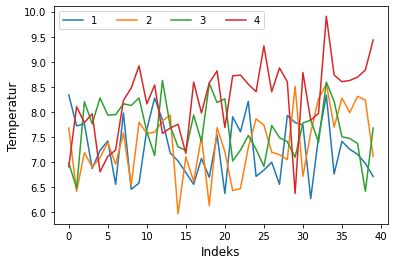

In [30]:
plt.plot(temp[indeks[0]:indeks[1]], label='1')
plt.plot(temp[indeks[1]:indeks[2]], label='2')
plt.plot(temp[indeks[2]:indeks[3]], label='3')
plt.plot(temp[indeks[3]:indeks[4]], label='4')
plt.legend(ncol=4)
plt.ylabel('Temperatur')
plt.xlabel('Indeks')
plt.show()

Dette kan vi også gjøre med en for-løkke, så slipper vi så mange nesten like kodelinjer:

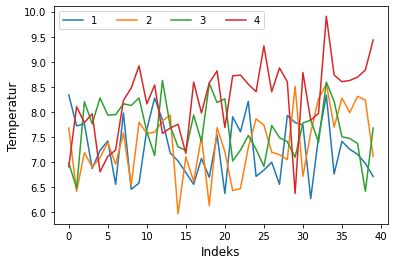

In [31]:
for i in range(4):
    plt.plot(temp[indeks[i]:indeks[i+1]], label=str(i+1))
plt.legend(ncol=4)
plt.ylabel('Temperatur')
plt.xlabel('Indeks')
plt.show()


Fordelen med for-løkker er at man slipper å skrive så mange nesten helt like kode-linjer. 

I eksemplene over har vi brukt `for in in range(x)`. Da er `i` indeksen til hver iterasjon. Men man kan også la `i` være faktiske verdier slik som under:

In [32]:
for val in indeks: 
    print(val)

# Sjekk at det er det samme:
indeks

0
40
80
120
160


[0, 40, 80, 120, 160]

Ved å bruke dette kan man gjøre for-løkken for plotting en del penere:

In [33]:
diff=int(len(tid)/4) # Fordi vi vet at vi har delt tidsserien inn i fire like deler
diff

40

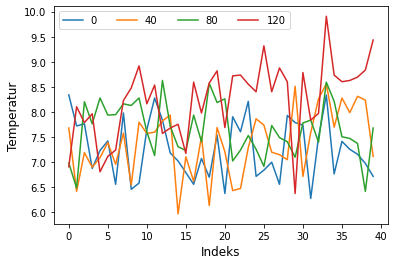

In [34]:
for ind in indeks[:-1]:
    plt.plot(temp[ind:ind+diff], label=str(ind))
plt.legend(ncol=4)
plt.ylabel('Temperatur')
plt.xlabel('Indeks')
plt.show()

## Del 2, oppgave 4
- Bruk en forløkke til å dele tidsserien inn i 5 like lange deler.
- Bruk er for-løkke til å plotte alle de 5 periodene i samme figur. 

I blant trenger man **både** en faktisk verdi **og** indeksen. Da kan man bruke `enumerate` istedet for `range`:

In [35]:
for count, val in enumerate(indeks):
    print('count:', count, 'val:', val)

count: 0 val: 0
count: 1 val: 40
count: 2 val: 80
count: 3 val: 120
count: 4 val: 160


Ved å bruke dette kan man gjøre begge de to siste stegene vi har gjort over (1: konvertere til integers og 2: plotte) inne i samme løkke. 

In [36]:
indeks=[
    0, 
    len(tid)*1/4, 
    len(tid)*2/4, 
    len(tid)*3/4,
    len(tid)
]
indeks

[0, 40.0, 80.0, 120.0, 160]

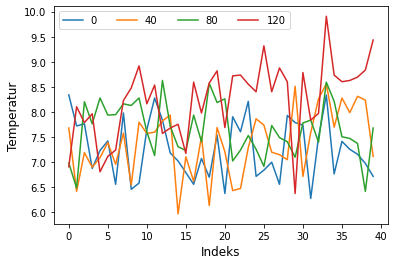

In [37]:
for count, val in enumerate(indeks[:-1]):
    ind=int(val) # konverter indeksen til integer
    plt.plot(temp[ind:ind+diff], label=str(ind))

plt.legend(ncol=4)
plt.ylabel('Temperatur')
plt.xlabel('Indeks')
plt.show()    


For å gjøre poenget med for-løkker enda tydeligere: Hva om vi vil beregne gjennomsnitt og standardavvik for ti-årsperiode, og så lage en figur over alle disse punktene?

In [38]:
# lag ny indekseringsvektor: 
diff=10 # Fordi vi vet at vi vil se på tiårsperioder

# Vi bruker np.arange fordi vi vet tidssteget vi vil ha
# syntaksen er: np.arange(start, stop, step)
indeks=np.arange(0, len(tid), diff) 
indeks

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150])

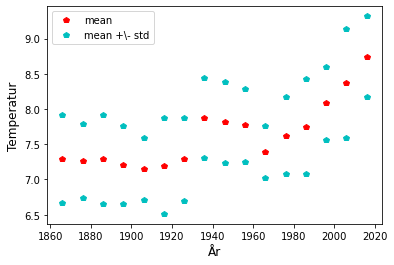

In [39]:
for count, val in enumerate(indeks):
    # Når f.eks. val=30 blir linjen under: np.mean(temp[30:30+10]), som er 
    # tiårsperiode nr 4. 
    mean=np.mean(temp[val:val+diff]) 
    std=np.std(temp[val:val+diff])
    
    # Vi vil plotte punktene midt i perioden de representerer. Derfor finner vi
    # verdien til "tid" ikke ved f.eks. 30 eller 40, men på indeks nr 35. 
    tid_mean=tid[int(val+diff/2)] 

    
    plt.plot(tid_mean, mean, 'rp')
    plt.plot(tid_mean, mean+std, 'cp')
    plt.plot(tid_mean, mean-std, 'cp')

    
# TIPS: Hvis vi satte label-navn i plottelinjene over ville legend blitt 
# veldig fordi hvert eneste punkt ville fått en linje i legend. I slike 
# tilfeller kan man plotte NaN-punkt og angi markørstil som matcher de 
# faktiske punktene man vil ha i legend. 
plt.plot(np.nan, np.nan, 'rp', label='mean')
plt.plot(np.nan, np.nan, 'cp', label='mean +\- std')
plt.legend()

plt.ylabel('Temperatur')
plt.xlabel('År')
plt.show()

Det ville vært lettere å se på denne figuren om det var linjer mellom punktene. For å få det til må vi lagre verdiene til `mean` og `std` i egne vektorer slik at vi kan plotte dem i sin helhet etter at vi har beregnet alle. 

In [40]:
# Lag to vektorer som kan fylles med verdier: 
# En for gjennomsnitt og en for std. 
mean=np.zeros(len(indeks))
std=np.zeros(len(indeks))
tid_mean=np.zeros(len(indeks))

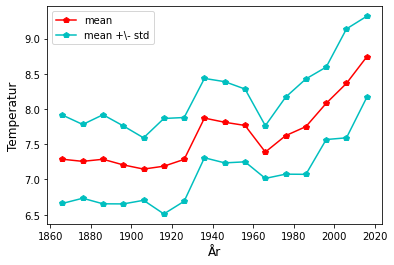

In [41]:
for count, val in enumerate(indeks):
    mean[count]=np.mean(temp[val:val+diff])
    std[count]=np.std(temp[val:val+diff])
    tid_mean[count]=tid[int(val+diff/2)]
    
# plot linjene og punktene 
plt.plot(tid_mean, mean, 'rp', linestyle='-', label='mean')
plt.plot(tid_mean, mean+std, 'cp', linestyle='-', label='mean +\- std')
plt.plot(tid_mean, mean-std, 'cp', linestyle='-')

plt.ylabel('Temperatur')
plt.legend()
plt.xlabel('År')
plt.show()

## Del 2, oppgave 5
- Bruk den metoden du vil til å dele tidsperioden inn i 16 like lange perioder. 
- Lag en figur som tilsvarer den over

- Gjør det samme igjen, men del perioden inn i 5 like lange perioder. Hva slags informasjon får du fra de forskjellige figurene? Hva er tydligs i den siste figuren vs den første, og motsatt?

### Andre løkker
Det finnes flere løkker enn for-løkker, f.eks. `if-løkker`. Denne oppgaven fokusere ikke på dette, men her er et kort eksempel for å vise hvordan det fungerer:

In [107]:
diff=3
if diff==3:
    print(diff)

3


In [108]:
if diff==4:
    print(diff)
elif diff > 4:
    print(diff)
else:
    print('diff is not equal or larger than 4')

diff is not equal or larger than 4


Vi kan bruke en if-løkke dersom vi f.eks. vil plotte en linje med punkter som skal være røde om det er varmere enn gjennomsnittet, og blå om det er kaldere enn gjennom snittet: 

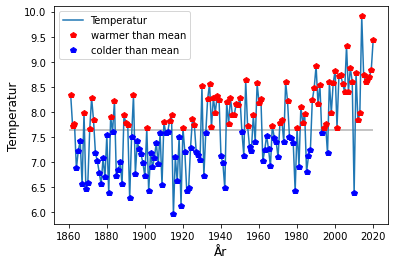

In [110]:
mean=np.mean(temp)

plt.plot(tid, temp, label='Temperatur')
for count, T in enumerate(temp):
    if T > mean:
        plt.plot(tid[count], T, 'rp')
    elif T < mean:
        plt.plot(tid[count], T, 'bp')

plt.plot(np.nan, np.nan, 'rp', label="warmer than mean")
plt.plot(np.nan, np.nan, 'bp', label='colder than mean')
plt.legend()

plt.hlines(mean, 1860, 2020, 'k', alpha=.3)
plt.ylabel('Temperatur')
plt.xlabel('År')
plt.show()

Her kunne man imidlertid også brukt indeksering:

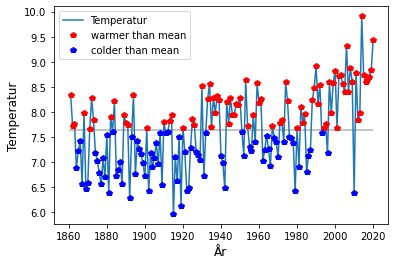

In [111]:
plt.plot(tid, temp, label='Temperatur')
plt.plot(tid[temp>mean], temp[temp>mean], 'rp')
plt.plot(tid[temp<mean], temp[temp<mean], 'bp')

plt.plot(np.nan, np.nan, 'rp', label="warmer than mean")
plt.plot(np.nan, np.nan, 'bp', label='colder than mean')
plt.legend()

plt.hlines(mean, 1860, 2020, 'k', alpha=.3)
plt.ylabel('Temperatur')
plt.xlabel('År')
plt.show()

Slike metoder kan være veldig gode for å vise endringer eller spesielle perioder. Figuren over viser for eksempel tydelig at det har blitt varmere mot slutten av tidsperioden. 

## Del 3: Scatterplot
Tidsserier er ikke den eneste måten å presentere data på! Vi så litt på scatterplots allerede i [Del5_sol_temp_nedbør](https://github.com/irendundas/EkteData/blob/main/NAT624/Del5_sol_temp_nedb%C3%B8r.ipynb), og her ser vi videre på hvordan det kan være hjelpsomt for å undersøke sammenhenger mellom variabler. 

Vi laster inn et nytt datasett: Nedbørsdata.

In [112]:
file='PrecipVestlandYearlyNonan.txt'
precip, tid_p = loadData(file)

file='TempBergenYearlyNonan.txt'
temp,tid_t = loadData(file)

temp=np.squeeze(temp)
precip=np.squeeze(precip)

In [113]:
# undersøk start og slutt til de to tidsseriene
print(tid_p[0])
print(tid_p[-1])
print(tid_t[0])
print(tid_t[-1])

1899.0
2020.0
1861.0
2020.0


In [114]:
# Finn indeksen der tid_t er lik det første året i tid_p
start=np.where(tid_t==tid_p[0]) 
# [0][0] må med for å få tak i kun tallet og ikke alle parantesene rundt
start=start[0][0] 

# Slett starten av temperatur-tidsserien, slik at både temp og nedbør starter
# samme år
temp=temp[start:] 
tid_t=tid_t[start:]

tid_t[0], tid_p[0]

(1899.0, 1899.0)

**Lag et scatterplot**

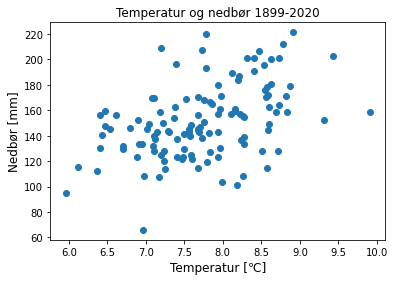

In [115]:
ax=plt.axes()
ax.scatter(temp,precip)
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
) 
plt.show()

Som i oppgaven [Del5_sol_temp_nedbør](https://github.com/irendundas/EkteData/blob/main/NAT624/Del5_sol_temp_nedb%C3%B8r.ipynb) fargekoder vi prikkene.

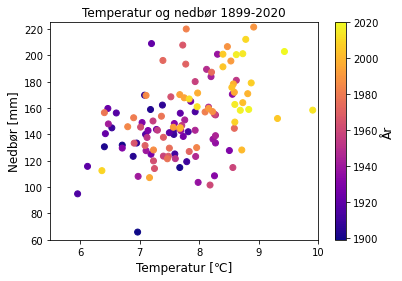

In [116]:
# cmap står for "colormap". Definer hvilken fargeskala du vil bruke. 
cmap=cm.get_cmap('plasma', len(temp)) 

# Definer at fargeskalaen skal basere seg på tidsvektoren din
colors = tid_t 

ax=plt.axes()

# Plot nedbør som en funksjon av temperatur. Fargeskalaen settes til "colors"
# (definert rett over), fargekartet settes til cmap som definert over, 
# og du setter min og maks grenser til fargeksalaen. 
sc=ax.scatter(
    temp, precip,
    c=colors, cmap=cmap,
    vmin=min(colors), vmax=max(colors),
) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(5.5, 10), 
    ylim=(60,225)
) 

# Plot fargeskalaen
plt.colorbar(sc, label='År') 

plt.show()

## Del 3, oppgave 6
Hvordan har forholdet mellom temperatur og nedbør endret seg over tid?


Bytt om få skriptet over slik at tid er langs x-aksen, temperatur langs y-aksen, og nedbør er fargekodet. Bruk et annet fargekart enn i figuren over. *Tips: redefiner xlim og ylim*

Hvilken figur synes du viser forholdet mellom nedbør og temperatur best? 

Hvis man hovedsakelig er interessert i for eksempel endring i temperatur med tid, men gjerne vil vise at dette henger sammen med nedbør kan man inkludere tidsserien i scatterplottet. Dette drar oppmerksomheten mot tidsserien, men man kan likevel se at det var tørrere i starten av tidsperioden. 

I linjen `sc=ax.scatter(...)` i cellen under definerer vi et par nye ting: 
- `s=50` gir størrelsen til prikkene (s: size)
- `zorder=2.5` gjør at prikkene kommer oppå linjen. [Default](https://matplotlib.org/stable/gallery/misc/zorder_demo.html) er at linjer kommer oppå prikker: ulike element har bestemte plasser i er plotte-hierarki i matplotlib. Men denne rekkefølgen kan endres ved å oppgi `zorder` (z-order: rekkefølge i z-retning, som tilsvarer lag på figuren).

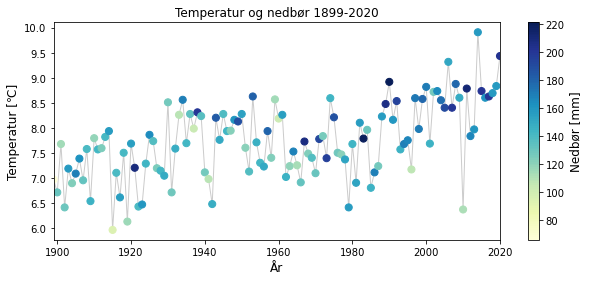

In [117]:
cmap=cm.get_cmap('YlGnBu',len(temp)) 
colors = precip 

# definer størrelsen til figuren, som i oppgaven Del5_sol_temp_nedbør
fig, ax = plt.subplots(figsize=(10,4))

# plot tidsserien
plt.plot(tid_t, temp, linewidth=1, color=[.8, .8, .8])


sc=ax.scatter(
    tid_t, temp,
    s=50,
    c=colors, cmap=cmap,
    vmin=min(precip), vmax=max(precip),
    zorder=2.5
) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Temperatur [\u2103]',
    xlabel='År', # \u2103 er koden for grader celcius. 
    xlim=(tid_t[0], tid_t[-1])
) 
plt.colorbar(sc, label='Nedbør [mm]') # denne linjen gjør at fargeskalaen vises til høyre. 


plt.show()

Det kan også være nyttig å inkludere linjer for gjennomsnitt og standardavvik.  Dette gjør det er tydelig å hva som er mer enn og mindre enn gjennomsnittet. 

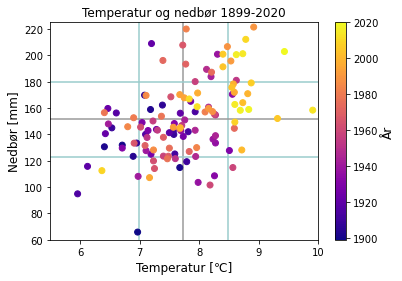

In [118]:
# cmap står for "colormap". Definer hvilken fargeskala du vil bruke. 
cmap=cm.get_cmap('plasma', len(temp)) 

# Definer at fargeskalaen skal basere seg på tidsvektoren din
colors = tid_t 

ax=plt.axes()

# Plot nedbør som en funksjon av temperatur. Fargeskalaen settes til "colors"
# (definert rett over), fargekartet settes til cmap som definert over, 
# og du setter min og maks grenser til fargeksalaen. 
sc=ax.scatter(
    temp, precip,
    c=colors, cmap=cmap,
    vmin=min(colors), vmax=max(colors),
    zorder=2.5
) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
    xlim=(5.5, 10), 
    ylim=(60,225), 
) 

# Plot fargeskalaen
plt.colorbar(sc, label='År') 

# Inkluder linjer for gjennomsnitt og standardavvik. 
plt.vlines(np.mean(temp), 60, 225, color=[.6, .6, .6])
plt.vlines(np.mean(temp)+np.std(temp), 60, 225, color=[.6, .8, .8])
plt.vlines(np.mean(temp)-np.std(temp), 60, 225, color=[.6, .8, .8])
plt.hlines(np.mean(precip), 5.5, 10, color=[.6, .6, .6])
plt.hlines(np.mean(precip)+np.std(precip), 5.5, 10, color=[.6, .8, .8])
plt.hlines(np.mean(precip)-np.std(precip), 5.5, 10, color=[.6, .8, .8])
plt.show()


## Del 3, oppgave 7
La temperatur definere fargeskalane og lag et nytt scatterplot. 
Prøv deg frem for å vise tydlig en sammenheng du vil fokusere på. 
- Vil du inkludere tidslinjen?
- Hvilket fargekart vil du bruker?
- Størrelse på prikkene?
- Rekkefølge på elementene i figuren?
- Hvilke variabler langs x- og y-aksene?
- Linjer for gjennomsnitt/standardavvik?